<a href="https://colab.research.google.com/github/jogapritam/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>


#**TERRORISM**

<h2><b>An Overview</b></h2> 


<h3>For the sake of simplicity we will try to get the picture of terrorism from the Global Terrorism Database's construction so that their is no issue in understanding the data visualizations. The GTD database uses the following definition of terrorism:</h3>



> <h3><i>The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. In practice this means in order to consider an incident for inclusion in the GTD, all three of the following attributes must be present:</i></h3>


> <ol>
  <h4>
  <i>
  <li> <b>The incident must be intentional</b> – the result of conscious   calculation on the part of a perpetrator.<br><br>
  <li> <b>The incident must entail some level of violence or immediate threat of violence</b> -including property violence, as well as violence against people.<br><br>
  <li><b>The perpetrators of the incidents must be sub-national actors.</b> The database does not include acts of state terrorism.<br><br>
  </i>
  </h4>
  </ol>

<h3><i>In addition, at least two of the following three criteria must be present for an incident to beincluded in the GTD:</i></h3> <br> 



> <ul>
  <h4>
  <i>
  <li><b>Criterion 1:</b> The act must be aimed at attaining a political, economic religious, or socialgoal. In terms of economic goals, the exclusive pursuit of profit does not satisfy this criterion. It must involve the pursuit of more profound, systemic economic change.<br><br>
  <li><b>Criterion 2:</b> There must be evidence of an intention to coerce,      intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims. It is the act taken as a totality that is considered, irrespective if every individual involved in carrying out the act was aware of this intention. As long as any of the planners or decision-makers behind the attack intended to coerce, intimidate or publicize, the intentionality criterion is met.<br><br>
  <li><b>Criterion 3:</b> The action must be outside the context of legitimate warfare activities. That is, the act must be outside the parameters permitted by international humanitarian law, insofar as it targets non-combatants.
  </i>
  </h4>
  </ul>













<h2><b> Column Variables</b></h2>


<i>
<ul>
<li> <b>year, month</b> and <b>date - </b>These fields contain the year, month and date in which the incidents occurred.

<li> <b>region, country</b> and <b>province - </b>These fields identify the region, then drilling down to country or location and then again drilling down to province- where the incident occurred.

<li> <b>latitude</b> and <b>longitude - </b>These fields contain the latitudes and longitudes of the area where the incident occured.

<li> <b>success - </b>Success of a terrorist strike is defined according to the tangible effects of the attack. Success is not judged in terms of the larger goals of the perpetrators.

<li> <b>attack_type - </b>This field captures the general method of attack and often reflects the broad class of tactics used.

<li> <b>target_type - </b>The target or victim type field captures the general type of target/victim

<li> <b>target - </b>The target subtype variable captures the more specific target category and provides
the next level of designation for each target type

<li> <b>weapon_type - </b>This field records the general type of weapon used in the incident.

<li> <b>terror_group - </b>This field contains the name of the group that carried out the attack.

<li> <b>suicide - </b>Cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 

<li> <b>killed - </b>This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident. 

<li> <b>wounded - </b>This field records the number of confirmed non-fatal injuries to both perpetrators and victims.

<li> <b>casualities - </b>Total number of kills and wounded as a direct result of the incident.



<li> <b>summary - </b>A brief narrative summary of the incident, noting the “when, where, who, what, how, and why.”



<li> <b>dbsource - </b>This field identifies the original data collection effort in which each event was recorded. Each value corresponds to a different data collection project or group. The three largest (PGIS, CETIS, and ISVG).
</i>











## *Import Required Libraries*

In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## *Let's Understand The Data*

In [2]:
#@title Default title text
#Make a handshake to our collab notebook with googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#here it's the path, where data is kept
file_path = ('/content/drive/MyDrive/Copy of Global Terrorism Data.csv')

#using this code our dataframe is going to read
df = pd.read_csv(file_path,encoding="ISO-8859-1")

In [4]:
#check our first 5 rows
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#check our last 5 rows
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
#check the dimension of our dataframe
df.shape

(181691, 135)

## *New Data Preparation By Cleaning Old Data*

In [7]:
#create a new column named casualities
df['casualties']=df['nwound']+df['nkill']

In [8]:
#after adding new column, dimention of dataframe will change
df.shape

(181691, 136)

In [9]:
#we want to keep only few columns as per our requirement

gtd_df = df[['iyear','imonth','iday','region_txt','country_txt','provstate','latitude','longitude','success','attacktype1_txt','targtype1_txt','target1','weaptype1_txt','gname','suicide','nkill','nwound','casualties','nkillter','summary','motive','propextent','dbsource']]

In [10]:
#renaming the required columns for easy readability

gtd_df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region_txt':'region','country_txt':'country','provstate':'province','attacktype1_txt':'attack_type','targtype1_txt':'target_type','target1':'target','weaptype1_txt':'weapon_type','gname':'terror_group','nkill':'killed','nwound':'wounded','nkillter':'perpetrator_kill','propextent':'propextent'},inplace = True)

In [11]:
#check our first five rows 
gtd_df.head()

,year,month,day,region,country,province,latitude,longitude,success,attack_type,target_type,target,weapon_type,terror_group,suicide,killed,wounded,casualties,perpetrator_kill,summary,motive,propextent,dbsource
0,1970,7,2,Central America & Caribbean,Dominican Republic,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,MANO-D,0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,PGIS
1,1970,0,0,North America,Mexico,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Unknown,23rd of September Communist League,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,PGIS
2,1970,1,0,Southeast Asia,Philippines,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Employee,Unknown,Unknown,0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,PGIS
3,1970,1,0,Western Europe,Greece,Attica,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Explosives,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Incendiary,Unknown,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS


In [12]:
#check the shape of our required Dataframe
gtd_df.shape

(181691, 23)

In [13]:
#check the structure ot our dataframe

gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              181691 non-null  int64  
 1   month             181691 non-null  int64  
 2   day               181691 non-null  int64  
 3   region            181691 non-null  object 
 4   country           181691 non-null  object 
 5   province          181270 non-null  object 
 6   latitude          177135 non-null  float64
 7   longitude         177134 non-null  float64
 8   success           181691 non-null  int64  
 9   attack_type       181691 non-null  object 
 10  target_type       181691 non-null  object 
 11  target            181055 non-null  object 
 12  weapon_type       181691 non-null  object 
 13  terror_group      181691 non-null  object 
 14  suicide           181691 non-null  int64  
 15  killed            171378 non-null  float64
 16  wounded           16

In [14]:
#lets check the short description of our dataframe

df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualties
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99

In [15]:
#lets check the number of data present in each variable
gtd_df.count()

year                181691
month               181691
day                 181691
region              181691
country             181691
province            181270
latitude            177135
longitude           177134
success             181691
attack_type         181691
target_type         181691
target              181055
weapon_type         181691
terror_group        181691
suicide             181691
killed              171378
wounded             165380
casualties          164817
perpetrator_kill    114733
summary             115562
motive               50561
propextent           64065
dbsource            181691
dtype: int64

In [16]:
#checking for Null values/missing data
gtd_df.isnull().sum()

year                     0
month                    0
day                      0
region                   0
country                  0
province               421
latitude              4556
longitude             4557
success                  0
attack_type              0
target_type              0
target                 636
weapon_type              0
terror_group             0
suicide                  0
killed               10313
wounded              16311
casualties           16874
perpetrator_kill     66958
summary              66129
motive              131130
propextent          117626
dbsource                 0
dtype: int64

In [17]:
#checking the percentage of missing data
missing_value_percentage = gtd_df.isnull().sum()*100/len(df)
missing_value_percentage

year                 0.000000
month                0.000000
day                  0.000000
region               0.000000
country              0.000000
province             0.231712
latitude             2.507554
longitude            2.508104
success              0.000000
attack_type          0.000000
target_type          0.000000
target               0.350045
weapon_type          0.000000
terror_group         0.000000
suicide              0.000000
killed               5.676120
wounded              8.977330
casualties           9.287196
perpetrator_kill    36.852678
summary             36.396409
motive              72.171984
propextent          64.739585
dbsource             0.000000
dtype: float64

In [18]:
#removing the columns with huge amount of missing data

gtd_df.drop(['motive','propextent','perpetrator_kill'],axis = 1,inplace = True)

In [19]:
#for Summary column where we don't have any data we'll replace it with unknown

gtd_df['summary'].replace(np.nan,'Unknown',inplace = True)

In [20]:
#Now update the missing values and check our final dataframe

gtd_df.head()

,year,month,day,region,country,province,latitude,longitude,success,attack_type,target_type,target,weapon_type,terror_group,suicide,killed,wounded,casualties,summary,dbsource
0,1970,7,2,Central America & Caribbean,Dominican Republic,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Julio Guzman,Unknown,MANO-D,0,1.0,0.0,1.0,Unknown,PGIS
1,1970,0,0,North America,Mexico,Federal,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Unknown,23rd of September Communist League,0,0.0,0.0,0.0,Unknown,PGIS
2,1970,1,0,Southeast Asia,Philippines,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Employee,Unknown,Unknown,0,1.0,0.0,1.0,Unknown,PGIS
3,1970,1,0,Western Europe,Greece,Attica,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Explosives,Unknown,0,NaN,NaN,NaN,Unknown,PGIS
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Incendiary,Unknown,0,NaN,NaN,NaN,Unknown,PGIS


In [21]:
#Now check the final shape of our Dataframe
gtd_df.shape

(181691, 20)

In [22]:
#Let's just try to visualise the missing data to have a better idea about it

import missingno as msno

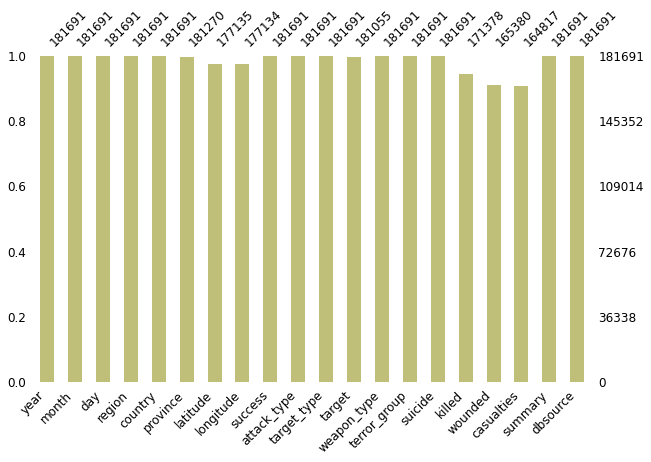

In [23]:
# visualising the missing values

msno.bar(gtd_df,figsize = (10,6),fontsize = 12,color = (0.75,0.75,0.475))

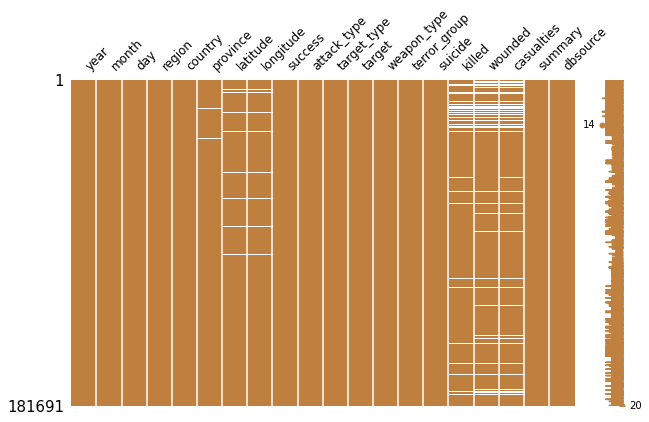

In [24]:
# visualising where exactly the missing values are present

msno.matrix(gtd_df,figsize = (10,6),fontsize = 12,color = (0.75,.50,0.25))

## *Exploratory Data Analysis*

In [25]:
#to know the correlation between all data
corr_df = gtd_df.corr()
corr_df

,year,month,day,latitude,longitude,success,suicide,killed,wounded,casualties
year,1.000000,0.000139,0.018254,0.166933,0.003917,-0.082963,0.137736,0.015341,0.015273,0.013934
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,-0.002845,0.003071,0.003463,0.002938,0.003446
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.011802,0.003593,-0.003693,-0.001268,-0.001269
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.073715,0.068682,-0.018124,0.015988,0.009996
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000858,0.000486,-0.000562,0.000223,0.000021
success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,1.000000,-0.031155,0.053115,0.025804,0.035385
suicide,0.137736,0.003071,0.003593,0.068682,0.000486,-0.031155,1.000000,0.136086,0.099525,0.120752
killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,0.053115,0.136086,1.000000,0.534375,0.690476
wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.025804,0.099525,0.534375,1.000000,0.980387
casualties,0.013934,0.003446,-0.001269,0.009996,0.000021,0.035385,0.120752,0.690476,0.980387,1.000000


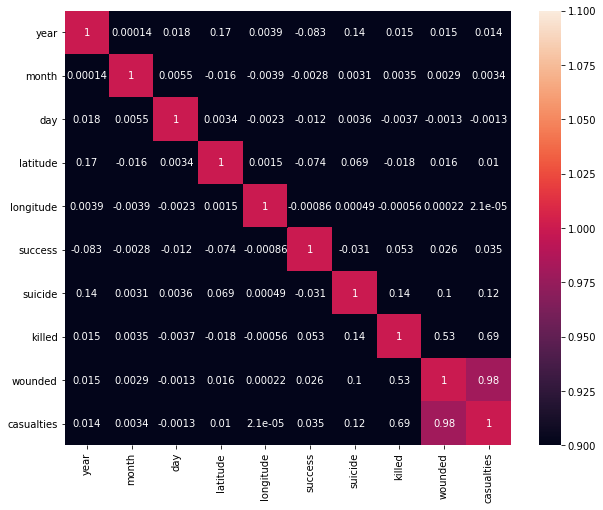

In [26]:
#Now plot a heatmap for the correlation between all data

plt.subplots(figsize=(10,8))
sns.heatmap(corr_df,vmin=1,annot=True)

It's showing clearly from the visualization that there are not much more correlation except the kills, wounded and casulities.Which is very obvious as we created casualities column by adding kills column and wounded column.

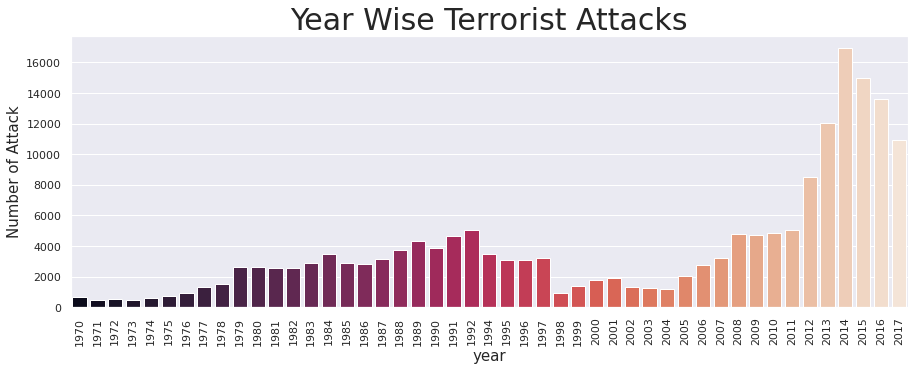

In [27]:
#we want to know the year wise terrorist attacks

plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid",context='notebook')

sns.barplot(x=gtd_df['year'].value_counts().index,
            y=gtd_df['year'].value_counts().values,palette='rocket')

plt.title('Year Wise Terrorist Attacks',size=30)
plt.xlabel('year',size=15)
plt.ylabel('Number of Attack',size=15)
plt.xticks(rotation=90)
plt.show()

It's Clearly showing that the year 2014 witnessed the highest number of terrorist attack and after 2004 the number of terrorist attacks started increasing.

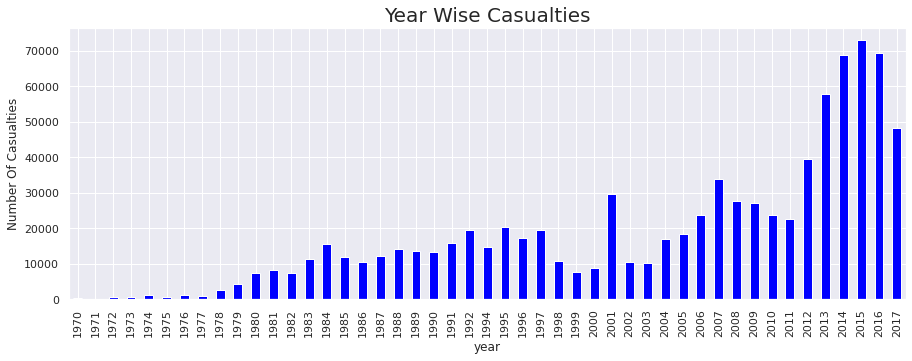

In [34]:
#We want to know the number of casualities per each year
year_wise_casualties=gtd_df.groupby('year').casualties.sum()

plt.rcParams['figure.figsize'] = (15,5)

year_wise_casualties.plot(kind='bar',color='blue')
plt.title('Year Wise Casualties',size=20)
plt.ylabel('Number Of Casualties')
plt.show()

From this plot, it's clearly visible that Number of casulties are more within 2012-2017.

1.   Least casualty cases in 1970 &1971.
2.   Max casualty cases in 2015.



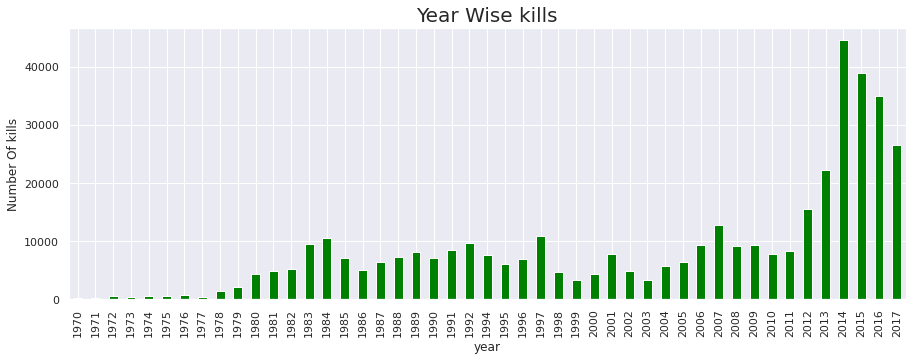

In [51]:
#we want to know the number of kills in each year
year_wise_kills=gtd_df.groupby('year').killed.sum()

plt.rcParams['figure.figsize'] = (15,5)

year_wise_kills.plot(kind='bar',color='green')
plt.title('Year Wise kills',size=20)
plt.ylabel('Number Of kills')
plt.show()



1.   Maximum number of people killed in 2014.
2.   Least number of people killed in 1970 &1971.



In [89]:
#we want to know the region wise terrorist attacks

affected_regions = gtd_df["region"].value_counts().sort_values() 
affected_regions

Australasia & Oceania            282
Central Asia                     563
East Asia                        802
North America                   3456
Eastern Europe                  5144
Central America & Caribbean    10344
Southeast Asia                 12485
Western Europe                 16639
Sub-Saharan Africa             17550
South America                  18978
South Asia                     44974
Middle East & North Africa     50474
Name: region, dtype: int64

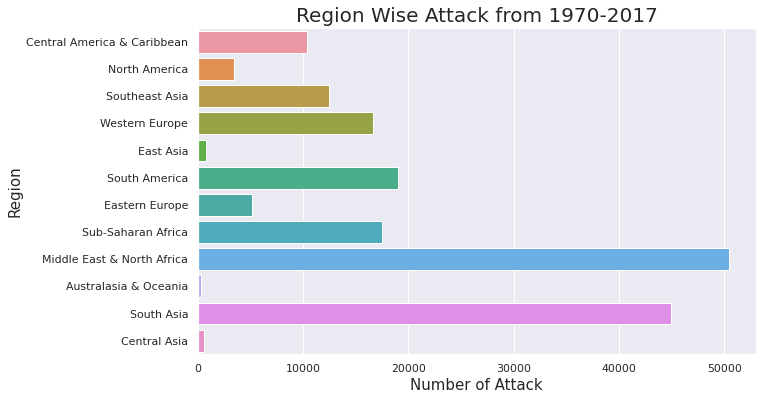

In [46]:
plt.subplots(figsize=(10,6))
sns.countplot(y='region',data=gtd_df)

plt.title('Region Wise Attack from 1970-2017',size=20)
plt.ylabel('Region',size=15)
plt.xlabel('Number of Attack',size=15)
plt.show()

It's clearly showing that Middle East & North Africa,South Asia,South America Regions are 3 most affected regions by terrorist attacks.

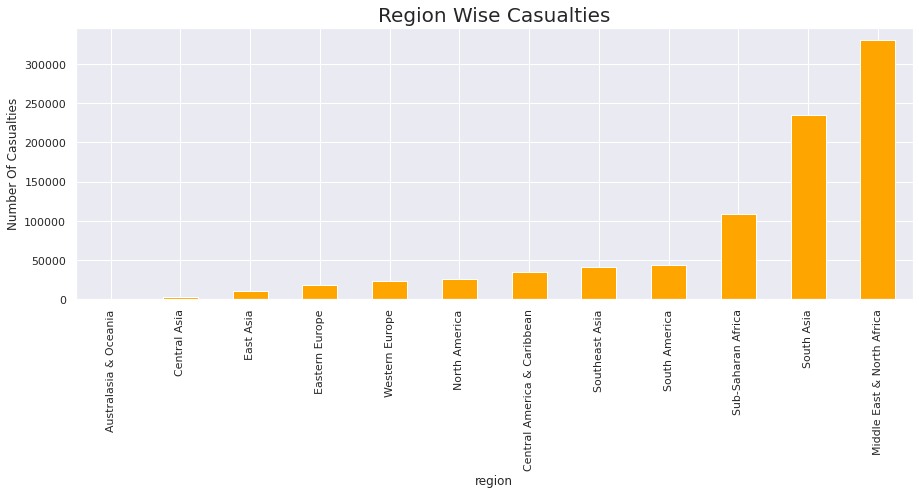

In [52]:
#We want to know the number of casualities per each region
region_wise_casualties=gtd_df.groupby('region').casualties.sum().sort_values()

plt.rcParams['figure.figsize'] = (15,5)

region_wise_casualties.plot(kind='bar',color='orange')
plt.title('Region Wise Casualties',size=20)
plt.ylabel('Number Of Casualties')
plt.show()

Maximum number of casualties are in Middle & North Africa.

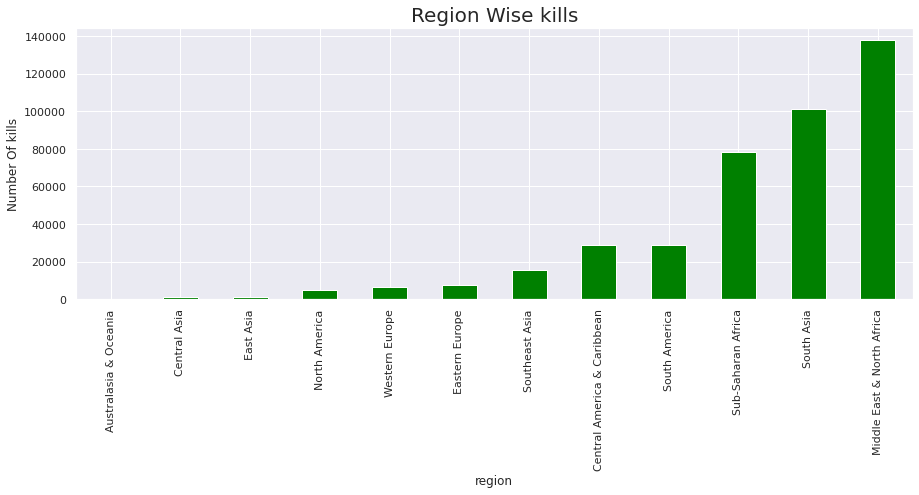

In [50]:
#we want to know the number of kills in each region
region_wise_kills=gtd_df.groupby('region').killed.sum().sort_values()

plt.rcParams['figure.figsize'] = (15,5)

region_wise_kills.plot(kind='bar',color='green')
plt.title('Region Wise kills',size=20)
plt.ylabel('Number Of kills')
plt.show()

Also highest number of kills are in Middle East & North Africa.

In [53]:
#we want to know the top 10 highest affected countries 
top20_affected_countries = gtd_df["country"].value_counts()[:10]
top20_affected_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country, dtype: int64

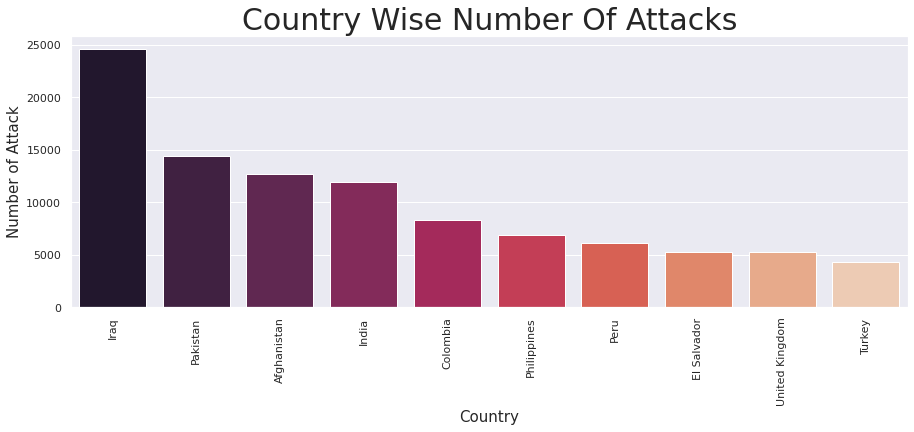

In [54]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid",context='notebook')

sns.barplot(x=gtd_df['country'].value_counts()[:10].index,
            y=gtd_df['country'].value_counts()[:10].values,palette='rocket')

plt.title('Country Wise Number Of Attacks',size=30)
plt.xlabel('Country',size=15)
plt.ylabel('Number of Attack',size=15)
plt.xticks(rotation=90)
plt.show()

This plot showing the top 10 terrorist affected countries. Iraq is the most affected country following by Pakistan,Afganistan,India,Colombia,etc.

In [90]:
#We want to know the number of attacks by each terrorist groups

Top_terrorist_groups = gtd_df['terror_group'].value_counts()[0:20]
Top_terrorist_groups

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

Here it,s showing that unknown groups (we don't know the name of the groups) are in 1st position. As we don't know the name of that groups,we can't give any clarity about that proper position. So we want to plot a graph with the groups having names.

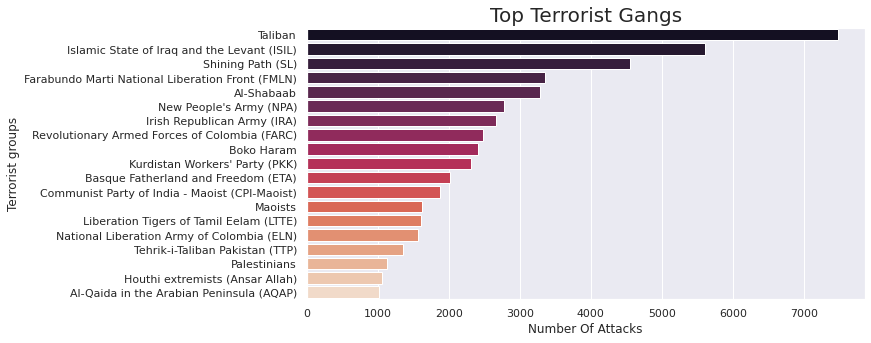

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(y=gtd_df['terror_group'].value_counts()[1:20].index,x=gtd_df['terror_group'].value_counts()[1:20].values,palette='rocket')
plt.title('Top Terrorist Gangs',size=20)
plt.xlabel('Number Of Attacks')
plt.ylabel('Terrorist groups')
plt.show()

After this map we can clearly say that Taliban is the Most dangerous Terrorist Group followed by ISIL,SL and so on.

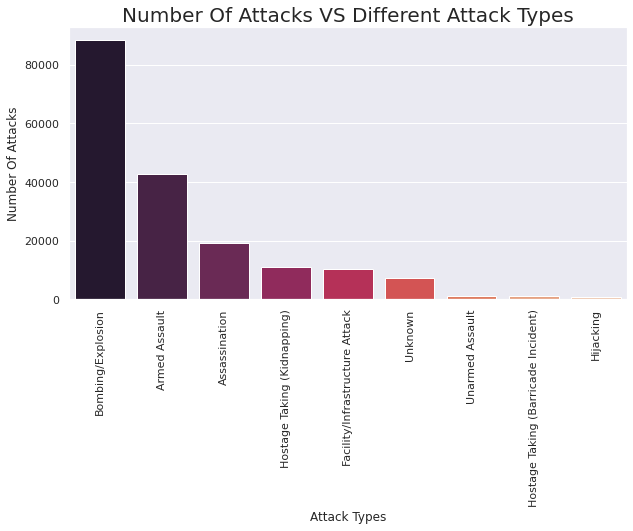

In [92]:
#We want to know that which attack type is used most of the time by terrorists
plt.figure(figsize=(10,5))
sns.barplot(x=gtd_df['attack_type'].value_counts().index,y=gtd_df['attack_type'].value_counts().values,palette='rocket')
plt.title("Number Of Attacks VS Different Attack Types",size=20)
plt.xlabel("Attack Types")
plt.ylabel("Number Of Attacks")
plt.xticks(rotation=90)
plt.show()

This plot showing that mostly Bombing Explosion attack type is used by the terrorists.

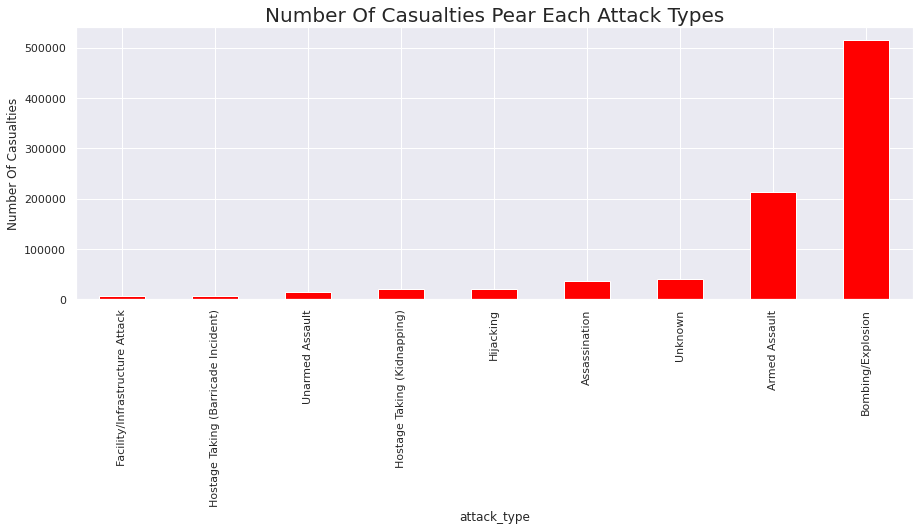

In [94]:
#We want to know the number of casualities done by each attack types
casualties_pear_each_attacktypes=gtd_df.groupby('attack_type').casualties.sum().sort_values()

plt.rcParams['figure.figsize'] = (15,5)

casualties_pear_each_attacktypes.plot(kind='bar',color='red')
plt.title('Number Of Casualties Pear Each Attack Types',size=20)
plt.ylabel('Number Of Casualties')
plt.show()

It's showing that


1.   Maximum number of casualties by Bombing/Explosion attack type.
2.   Least number of casualties by Facility/Infrastructure Attack.



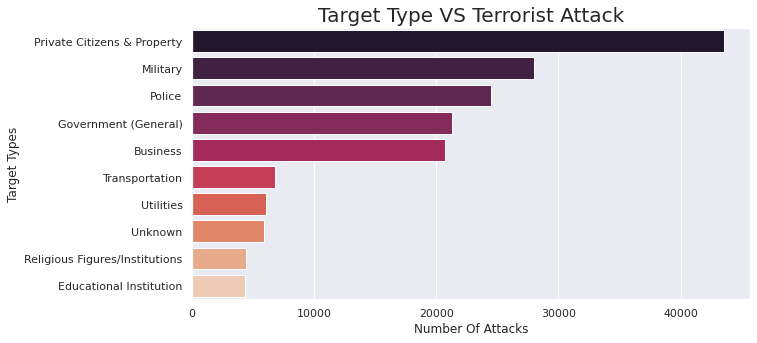

In [95]:
#we want to know the target types followed by terrorists
plt.figure(figsize=(10,5))
sns.barplot(y=gtd_df['target_type'].value_counts()[:10].index,x=gtd_df['target_type'].value_counts()[:10].values,palette='rocket')
plt.title('Target Type VS Terrorist Attack',size=20)
plt.xlabel('Number Of Attacks')
plt.ylabel('Target Types')
plt.show()

This plot indicates that Terrorists are mostly Targeting on private citizen & property,Military,police,Government,business and so on..

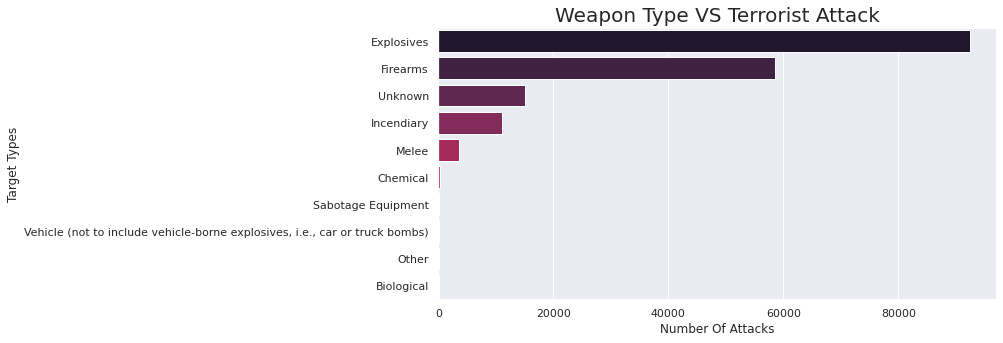

In [96]:
#w want to know which weapon types are used mostly by terrorost groups
plt.figure(figsize=(10,5))
sns.barplot(y=gtd_df['weapon_type'].value_counts()[:10].index,x=gtd_df['weapon_type'].value_counts()[:10].values,palette='rocket')
plt.title('Weapon Type VS Terrorist Attack',size=20)
plt.xlabel('Number Of Attacks')
plt.ylabel('Target Types')
plt.show()


This plot showing that terrorist groups are mostly used explosives,firearms,incendiary,melee for attack. Some unknown weapon types are also used about which we can't tell anything.

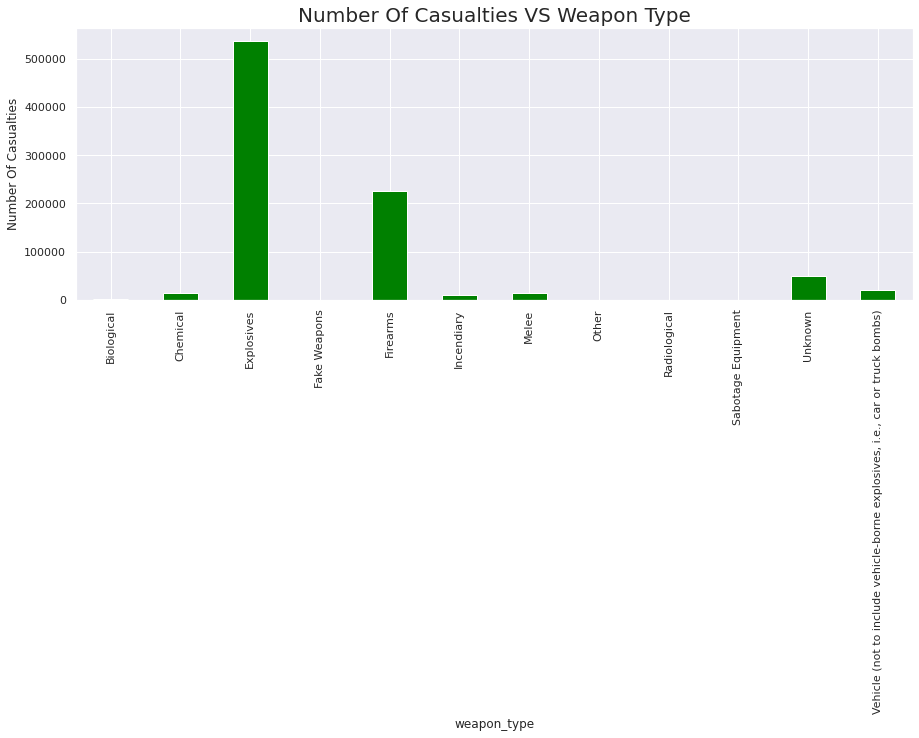

In [83]:
#We want to know the number of casualities by each weapon types
casualties_by_each_weapon_types=gtd_df.groupby('weapon_type').casualties.sum()

plt.rcParams['figure.figsize'] = (15,5)
casualties_by_each_weapon_types.plot(kind='bar',color='green')
plt.title('Number Of Casualties VS Weapon Type',size=20)
plt.ylabel('Number Of Casualties')
plt.show()

Maximum number of casualties are formed by Explosives weapon type.

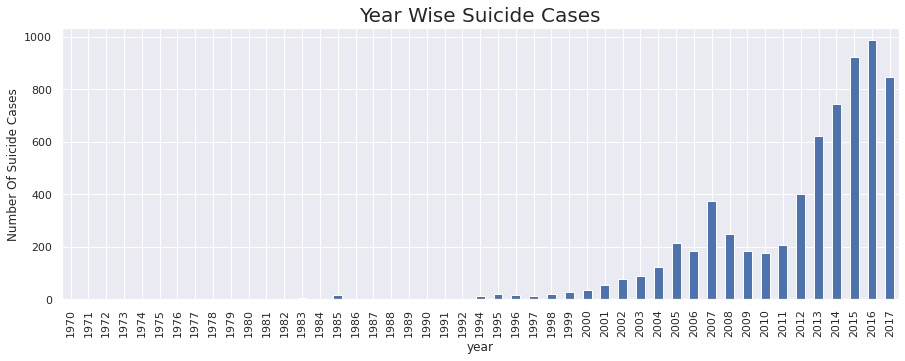

In [84]:
#We want to know the number of suicide cases per each year

year_wise_casualties=gtd_df.groupby('year').suicide.sum()

plt.rcParams['figure.figsize'] = (15, 5)

year_wise_casualties.plot(kind='bar')
plt.title('Year Wise Suicide Cases',size=20)
plt.ylabel('Number Of Suicide Cases')
plt.show()

It's clearly showing that the highest number of suicide cases are in the year 2016 followed by 2015,2017,2014,2013 and so on.

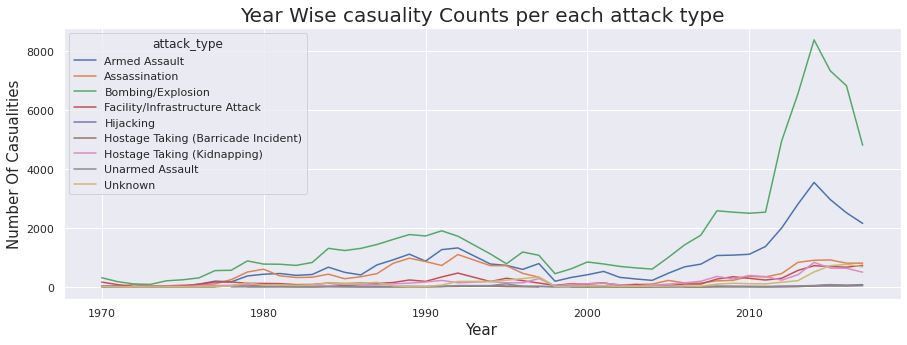

In [85]:
#we want to know year wise casualities counts on different attack type
year_wise_casualities = gtd_df.groupby(['year','attack_type'])['casualties'].count().unstack()

year_wise_casualities.plot()

plt.title('Year Wise casuality Counts per each attack type',size=20)
plt.ylabel('Number Of Casualities',size=15)
plt.xlabel('Year',size=15)
plt.show()

Previously we noticed that terrorists are using mainly bombing/explosion method. This plot showing that the highest number of casualties are done by Bombing/Explosion method in each year. 

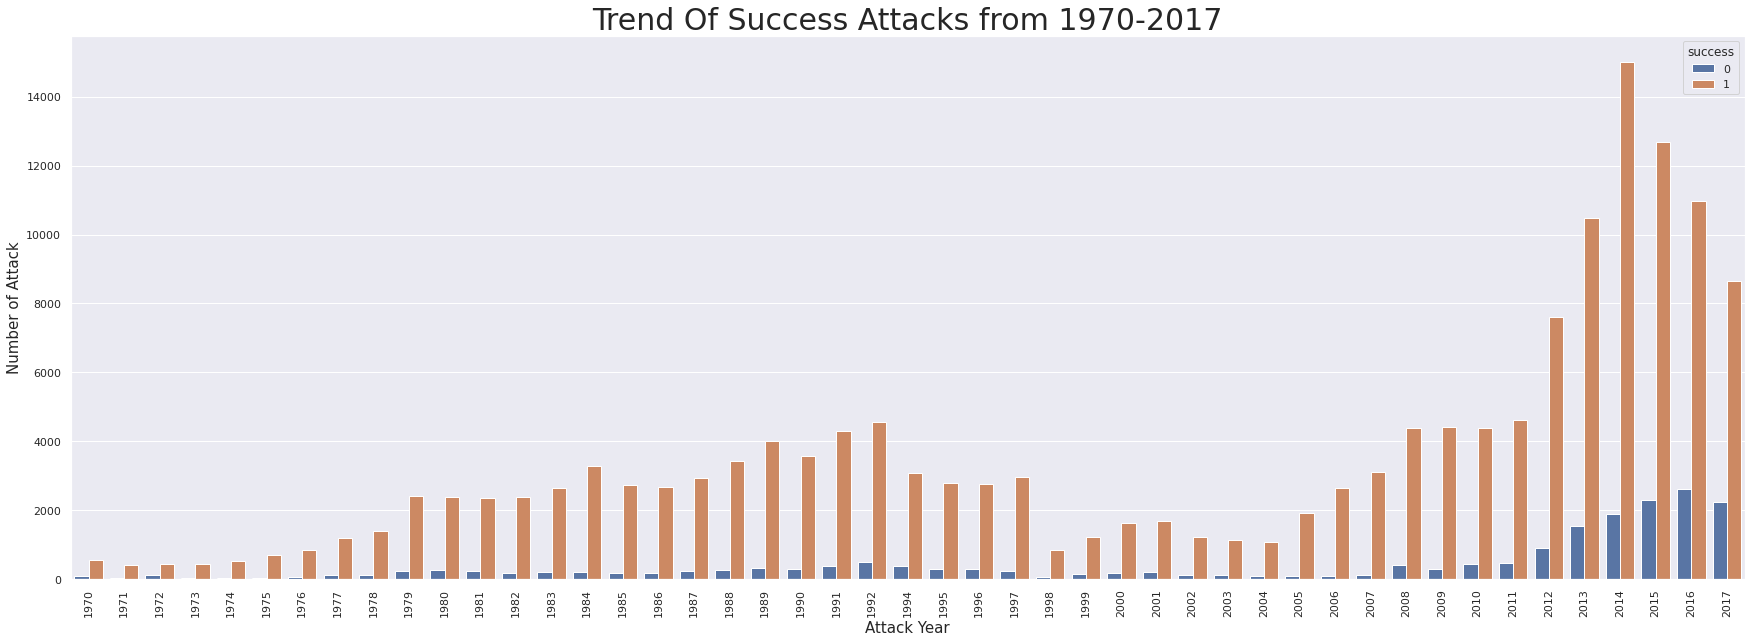

In [86]:
#we want to know the success trend of terrorist attack from 1970-2017
plt.figure(figsize=(30,10))
sns.countplot(x='year',hue='success',data=gtd_df)

plt.title('Trend Of Success Attacks from 1970-2017',size=30)
plt.xlabel('Attack Year',size=15)
plt.ylabel('Number of Attack',size=15)
plt.xticks(rotation=90)
plt.show()


We know that 0=incident was not successful & 1=incident was successful.So it's showing that almost every year terrorist attacks were successful but after 2007 some of the attacks were unsuccessfull,which ig a good thing.

In [88]:
#we want to know which particular group is active in which region and which countries

gtd_division = pd.DataFrame(gtd_df.groupby(['terror_group','country','region']).casualties.agg(['count','sum']).sort_values('sum',ascending = False))
gtd_division.reset_index(inplace = True)
gtd_division.rename(columns = {'region':'country_in_region','count':'total_cases','sum':'total_casualities'},inplace = True)


final = gtd_division.loc[gtd_division['terror_group'] != 'Unknown'][:10]
final

,terror_group,country,country_in_region,total_cases,total_casualities
1,Taliban,Afghanistan,South Asia,6832,54260.0
2,Islamic State of Iraq and the Levant (ISIL),Iraq,Middle East & North Africa,4114,47279.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,South Asia,1523,20758.0
5,Al-Qaida,United States,North America,4,19494.0
7,Boko Haram,Nigeria,Sub-Saharan Africa,1505,16315.0
8,Tehrik-i-Taliban Pakistan (TTP),Pakistan,South Asia,1292,15272.0
10,Shining Path (SL),Peru,South America,3998,14052.0
11,Al-Qaida in Iraq,Iraq,Middle East & North Africa,601,14034.0
12,Al-Shabaab,Somalia,Sub-Saharan Africa,2004,12020.0
13,Farabundo Marti National Liberation Front (FMLN),El Salvador,Central America & Caribbean,2523,11382.0


Each terrorist groups are active in a specific countryof a specific region.Taliban is active in Afganistan of South Asia region,ISIL is active in Iraq of Middle East & North Africa Region,like this.

# *CONCLUSION*

**From our study,we conclude that**

*   Middle East & North Africa,South Asia,South America Regions are 3 most affected regions by terrorist attacks.
*   Iraq is the most affected country following by Pakistan,Afganistan,India,Colombia,etc.

*   Taliban is the Most dangerous Terrorist Group.
*   the year 2014 witnessed the highest number of terrorist attack and after 2004 the number of terrorist attacks started increasing.

*   Number of casulties are more within 2012-2017.
*   The highest number of casualties are in the region of Middle East & North Africa.


*   Mostly Bombing Explosion attack type is used by the terrorists.
*   Terrorists are mostly Targeting on private citizen & property,Military,police,Government,business persons,etc.


*   terrorist groups are mostly used explosives,firearms,incendiary,melee for attack


*   The highest number of suicide cases are in the year 2016 followed by 2015,2017,2014,2013 and so on.




*   The highest number of casualties are done by Bombing/Explosion method in each year.
*   Almost every year terrorist attacks were successful but after 2007 some of the attacks were unsuccessfull.














